In [68]:
from lcls_tools.common.measurements.emittance_measurement import QuadScanEmittance
from lcls_tools.common.measurements.screen_profile import ScreenBeamProfileMeasurement
from lcls_tools.common.devices.reader import create_magnet, create_screen
from lcls_tools.common.frontend.plotting.image import plot_image_projection_fit
import epics
import matplotlib.pyplot as plt
import numpy as np

In [69]:
def plot_screen_beam_fit():
    pass

In [70]:
magnet = create_magnet('DL1', 'QM03')
screen = create_screen('DL1', 'OTR2')
print(screen)
print(magnet.controls_information.PVs)
bmax = magnet.bmax
bmin = magnet.bmin
print(screen.controls_information.PVs)
print(bmax)
scan_values = np.linspace(bmin,bmax,5) 

name='OTR2' controls_information=ScreenControlInformation(control_name='OTRS:IN20:571', PVs=ScreenPVSet(image=<PV 'OTRS:IN20:571:Image:ArrayData', count=480000/480000, type=time_double, access=read/write>, n_col=<PV 'OTRS:IN20:571:Image:ArraySize1_RBV', count=1, type=time_long, access=read/write>, n_row=<PV 'OTRS:IN20:571:Image:ArraySize0_RBV', count=1, type=time_long, access=read/write>, n_bits=<PV 'OTRS:IN20:571:N_OF_BITS': not connected>, resolution=<PV 'OTRS:IN20:571:RESOLUTION', count=1, type=time_double, access=read/write>)) metadata=Metadata(area='DL1', beam_path=['CU_ALINE', 'CU_HTXI', 'CU_HXR', 'CU_HXTES', 'CU_SFTH', 'CU_SPEC', 'CU_SXR'], sum_l_meters=14.241, type='PROF', safe_level=None, read_tolerance=None)
bctrl=<PV 'QUAD:IN20:771:BCTRL', count=1, type=time_double, access=read/write> bact=<PV 'QUAD:IN20:771:BACT', count=1, type=time_double, access=read/write> bdes=<PV 'QUAD:IN20:771:BDES', count=1, type=time_double, access=read/write> bcon=<PV 'QUAD:IN20:771:BCON', count=1,

In [71]:
beam_measurement = ScreenBeamProfileMeasurement(device = screen)
QuadScanEmittance(magnet=magnet, energy= 1e9, scan_values= scan_values, beamsize_measurement= beam_measurement)

QuadScanEmittance(name='quad_scan_emittance', save_data=True, save_location=None, energy=1000000000.0, scan_values=[-20.0, -10.0, 0.0, 10.0, 20.0], magnet=Magnet(name='QM03', controls_information=MagnetControlInformation(control_name='QUAD:IN20:771', PVs=MagnetPVSet(bctrl=<PV 'QUAD:IN20:771:BCTRL', count=1, type=time_double, access=read/write>, bact=<PV 'QUAD:IN20:771:BACT', count=1, type=time_double, access=read/write>, bdes=<PV 'QUAD:IN20:771:BDES', count=1, type=time_double, access=read/write>, bcon=<PV 'QUAD:IN20:771:BCON', count=1, type=time_double, access=read/write>, ctrl=<PV 'QUAD:IN20:771:CTRL': not connected>, bmin=<PV 'QUAD:IN20:771:BMIN', count=1, type=time_double, access=read/write>, bmax=<PV 'QUAD:IN20:771:BMAX', count=1, type=time_double, access=read/write>)), metadata=MagnetMetadata(area='DL1', beam_path=['CU_ALINE', 'CU_HTXI', 'CU_HXR', 'CU_HXTES', 'CU_SFTH', 'CU_SXR'], sum_l_meters=19.576, type='QUAD', safe_level=None, read_tolerance=None, l_eff=0.108, b_tolerance=Non

In [72]:

res = beam_measurement.measure()

raw_images=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]]) processed_images=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]]) rms_sizes=array([[6.02672352, 8.03563135]]) centroids=array([[299.49443, 399.50626]]) total_intensities=array([1.e+09]) metadata={'name': 'beam_profile', 'save_data': True, 'save_location': None, 'device': {'name': 'OTR2', 'controls_information': {'control_name': 'OTRS:IN20:571', 'PVs': {'image': <PV 'OTRS:IN20:571:Image:ArrayData', count=480000/480000, type=time_double, access=read/write>, 'n_col': <PV 'OTRS:IN20:571:Image:ArraySize1_RBV', count=1, type=time_long, acce

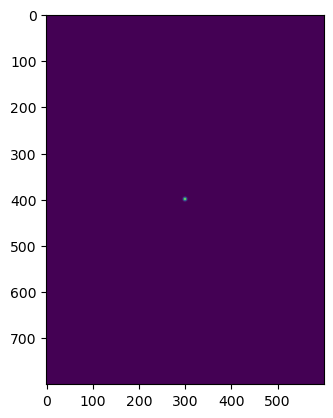

In [73]:

# i don't think beam_meaurement.measure() is working in particular the image processing.
img = res.processed_images[0]
plt.imshow(img)
print(res)
#plot_image_projection_fit(res)


(<Figure size 400x900 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

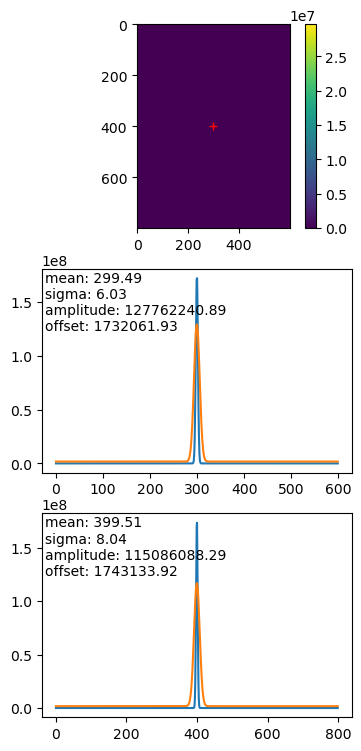

In [74]:
res2 = beam_measurement.beam_fit.fit_image(img)
plot_image_projection_fit(res2)

cannot connect to QUAD:IN20:471:BCTRL


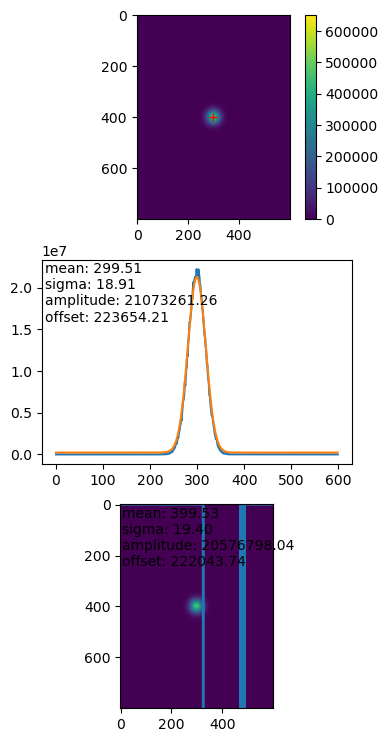

In [ ]:
epics.caput('QUAD:IN20:425:BCTRL', 15)
epics.caput('QUAD:IN20:441:BCTRL', 3)
epics.caput('QUAD:IN20:471:BCTRL', -6)
epics.caput('QUAD:IN20:511:BCTRL', -1.5)
epics.caput('QUAD:IN20:525:BCTRL', -18)
res = beam_measurement.measure()
img = res.processed_images[0]
fitted = beam_measurement.beam_fit.fit_image(img)
plot_image_projection_fit(fitted)
nrow = epics.caget('OTRS:IN20:571:Image:ArraySize0_RBV')
ncol= epics.caget('OTRS:IN20:571:Image:ArraySize1_RBV')
flat_image=epics.caget('OTRS:IN20:571:Image:ArrayData')
image = np.array(flat_image).reshape(ncol,nrow)


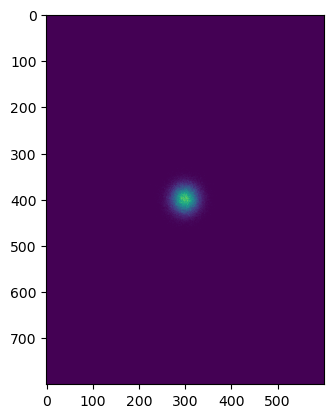

In [76]:
plt.imshow(image)
